# Chaines de Markov et épidémiologie : _Propagation d’une épidémie dans une population_



L’objectif de ce projet est de manipuler des chaînes de Markov pour étudier la propagation d’une épidémie dans une population.

## Partie 1 : Apprentissage des paramètres d’un modèle à partir de données

In [1]:

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


Dans notre modèle, nous allons considérer qu’à chaque temps :
*   Chaque individu sain peut rester sain ou devenir infecté,peut rester infecté ou devenir guéri et reste guéri
et que la probabilité de passer d’un état à l’autre ne dépend que de l’état précédent.

Nous disposons d’une séquence d’observations et nous souhaitons apprendre les paramètres de la
chaîne de Markov permettant de modéliser le processus qui a généré la séquence. Nous avons
suivi un individu pendant 10 jours, afin de déterminer a chaque temps dans quel état se trouvait l’individu.
Nous avons obtenu la séquence d’observation suivante : S, S, S, I, I ,I ,I , I, I, R.

In [2]:
#On définit in dictionnaire pour les états
etats = {'S':0, 'I':1, 'R':2}

**1- L'estimation des probabilités de transision entre les états**



*   Un individu sain reste sain 
avec un probabilité de 
$\frac{2}{3}$ ou deviens infecté avec une probabilité de $\frac{1}{3}$
*   Un individu infecté reste infecté avec un probabilité de 
$\frac{5}{6}$ ou deviens guéri avec un probabilité de 
$\frac{1}{6}$
*   Un individu guéri reste guéri avec un probabilité de 
1






**La matrice de probabilité de transitions est**

| \ | S | I | R |
|:---:|:---:|:---:|:---:|
| S | 2/3 | 1/3 | 0 |
| I | 0 | 5/6 | 1/6 |
|R | 0 | 0 | 1 |


In [3]:
# Création de la matrice de transition
MatP = np.array([[2/3, 1/3, 0],[0, 5/6, 1/6],[0, 0, 1]])

 Nous allons suivre maintenant une population de 5000 individus, pendant 200 jours.

1. Lire des données

In [4]:
#lecture des données 
data = np.loadtxt('data_exo_2022.txt', dtype = 'int')

2- Estimation des probabilités de transition entre les états et dressage de la matrice de probabilité de transitions

In [5]:
matT = np.zeros((3,3))

def create_matriceT(data,matT) :
    res = np.zeros((3,3)) #matrice qui stocke le nombre de SS,SI,SR...,RR respectivement en [0,0], [0,1], [0,2] ...
    li, col = data.shape
    
    #on calcule le nombre de chaque transition
    for i in range(li):
        for j in range(col - 1):
            res[data[i][j]][data[i][j+1]] += 1
    
    #cree la matrice de transition à partir de res
    for i in range(3):
        for j in range(3):
            matT[i][j] = res[i][j] / res.sum(axis = 1)[i]
            
    return matT


print (create_matriceT(data,matT))

[[0.93082918 0.06917082 0.        ]
 [0.         0.93518148 0.06481852]
 [0.04065945 0.         0.95934055]]


### Partie 2 : Description du premier modèle

La probabilité pour un individu d’être dans un de ces 3 états au temps t, ne dépend que l’état dans
lequel il est au temps t − 1.

Un individu dans l’état sain a une probabilité de 0.92 de rester sain et une probabilité de 0.08 de
devenir infecté. Un individu infecté peut le rester avec une probabilité de 0.93 et être guéri avec
une probabilité de 0.07. S’il est dans l’état guéri, il reste dans cet état avec une probabilité de 1.


1. Création de la matrice de transition A
| \ | S | I | R |
|:---:|:---:|:---:|:---:|
| S | 0.92 | 0.08 | 0 |
| I | 0 | 0.93| 0.07 |
|R | 0 | 0 | 1 |

In [6]:
# Création de la matrice de transition
MatA = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.0, 0.0, 1.0]])

**Création d'une fonction permettant de vérifier qu’une matrice est
stochastique.**
On doit vérifier dans la matrice que toute les probas sont entre 0 et 1 et la somme de chaque ligne vaut 1.

In [7]:
def is_stoch(mat):
    """
    Verifie qu'une matrice de transition est stochastique

    Arguments:
        mat {np.array} -- la matrice de transition
    """
    li, col = mat.shape
    
    for i in range(li):
        if mat.sum(axis = 1)[i] != 1:
            return False
    return True

is_stoch(MatA)

True

Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.

**2. Création de π0 la distribution de probabilité initiale:**

In [8]:
# Création de  π0 la distribution de probabilité initiale.
π0 = np.array([0.9, 0.1, 0])

# Distribution πt

**T = 0**  
P(S) = 0.9; P(I) = 0.1; P(R) = 0

**T = 1**  
P(S) = 0.828; P(I) = 0.165; P(R) = 0.007

**T = 2**  
P(S) = 0.76176; P(I) = 0.21969; P(R) = 0.01855



1. la probabilité pour un individu d’être sain, infecté ou guéri au temps
t = 1






In [9]:
π1 = np.dot(π0, MatA)
print(π1)

[0.828 0.165 0.007]



2. la probabilité pour un individu d’être sain, infecté ou guéri au temps t = 2 



In [10]:
π2 = np.dot(π1, MatA)
print(π2)

[0.76176 0.21969 0.01855]




3. pour chaque temps t entre 1 et 200, calcul de la distribution théorique des effectifs dans chaque état (Rappel πt+1 = πtA )  



In [11]:
πt = np.zeros((200, 3))
πt[0] = π0
for i in range(1, 200) :
    πt[i] = np.dot(πt[i-1], MatA)
    print(πt[i])


[0.828 0.165 0.007]
[0.76176 0.21969 0.01855]
[0.7008192 0.2652525 0.0339283]
[0.64475366 0.30275036 0.05249598]
[0.59317337 0.33313813 0.0736885 ]
[0.5457195  0.35727233 0.09700817]
[0.50206194 0.37592083 0.12201723]
[0.46189699 0.38977132 0.14833169]
[0.42494523 0.39943909 0.17561568]
[0.39094961 0.40547397 0.20357642]
[0.35967364 0.40836676 0.2319596 ]
[0.33089975 0.40855498 0.26054527]
[0.30442777 0.40642811 0.28914412]
[0.28007355 0.40233237 0.31759409]
[0.25766766 0.39657498 0.34575735]
[0.23705425 0.38942815 0.3735176 ]
[0.21808991 0.38113252 0.40077757]
[0.20064272 0.37190043 0.42745685]
[0.1845913  0.36191882 0.45348988]
[0.169824   0.35135181 0.4788242 ]
[0.15623808 0.3403431  0.50341882]
[0.14373903 0.32901813 0.52724284]
[0.13223991 0.31748598 0.55027411]
[0.12166072 0.30584116 0.57249813]
[0.11192786 0.29416513 0.59390701]
[0.10297363 0.2825278  0.61449857]
[0.09473574 0.27098875 0.63427551]
[0.08715688 0.25959839 0.65324473]
[0.08018433 0.24839906 0.67141661]
[0.07376958 



4. Représentez graphiquement la probabilité d’être dans chaque état en fonction du temps.



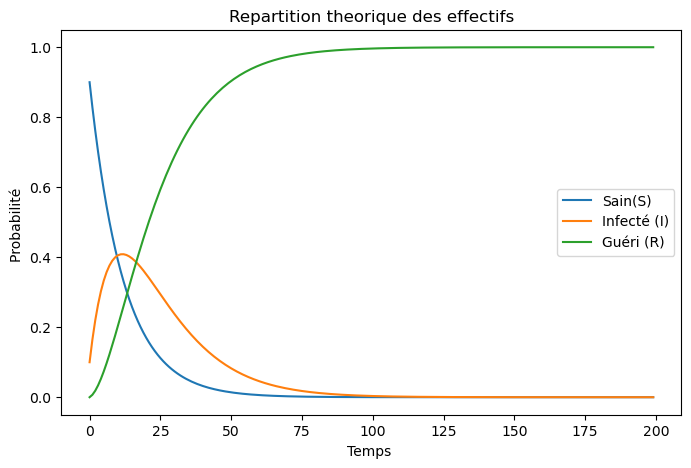

In [12]:
A= np.arange(200)
graphe = plt.figure(figsize=(8,5))
plt.title("Repartition theorique des effectifs")
plt.plot(A, πt[:,0] ,label = 'Sain(S)')
plt.plot(A, πt[:,1] ,label = 'Infecté (I)')
plt.plot(A, πt[:,2] ,label = 'Guéri (R)')
plt.xlabel("Temps ")
plt.ylabel("Probabilité ")
plt.legend()
plt.show()


- Nous observons au tout début que tous les individus sont sains , ce nombre diminue tres rapidement et devient nul au bout d'une soixantaine de jours.

- Le nombre d'individus infectés quant à lui était très bas au debut de la pandemie , il accroit jusqu'à atteindre le pic de la pandemie à 40% , ensuite il diminue assez et devient nul au alentour du 80 éme jour.

- Au meme moment le nombre d'individus guéris accroit avec la baisse des individus infectés et au alentour du 80 eme jour tous les individus infectés deviennent guéris.

## Tirage  aléatoire des états

Générer une séquence de taille T en utilisant cette chaîne de Markov.

In [13]:
def  sequence_aleatoire(matA, PHI0, t, n):
    sequ_etat = np.zeros((n, t))
    for j in range(n):
        sequ_etat[j, 0] = np.random.choice([0., 1., 2.], p=PHI0)
        for i in range(1, t):
            sequ_etat[j, i] = np.random.choice([0., 1., 2.], p=matA[int(sequ_etat[j, i-1])])
    return sequ_etat

## Modélisation d'une population

1.A chaque temps t, calcul du nombre d’individus sains, infectés et guéris dans la population & affichage l’évolution du nombre d’individus dans les trois états en fonction du temps.

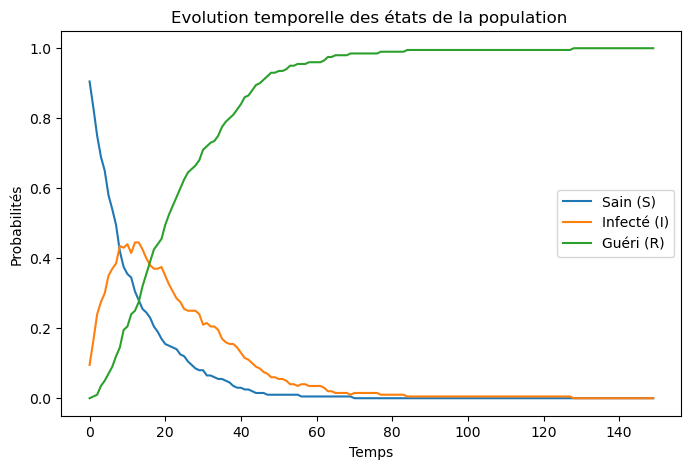

In [14]:

def affiche_graphe_prop(MatA, PHI0, t, n):
    A = np.arange(t)
    
    sequ_popu = sequence_aleatoire(MatA, PHI0, t, n)

    πt = np.zeros((t, 3))
    πt[:,0] = np.sum(sequ_popu == 0., axis=0)
    πt[:,1] = np.sum(sequ_popu == 1., axis=0)
    πt[:,2] = np.sum(sequ_popu == 2., axis=0)
    πt /=n    
    graph = plt.figure(figsize=(8, 5))
    plt.title("Evolution temporelle des états de la population ")
    plt.plot(A, πt[:,0], label='Sain (S)')
    plt.plot(A, πt[:,1], label="Infecté (I)")
    plt.plot(A, πt[:,2], label="Guéri (R)")
    plt.xlabel("Temps")
    plt.ylabel("Probabilités")
    plt.legend()
    plt.show()

affiche_graphe_prop(MatA,π0, 150, 200 )




2.  Affichage pourcentage d’indivudus sains infectés et guéris en fonction du temps



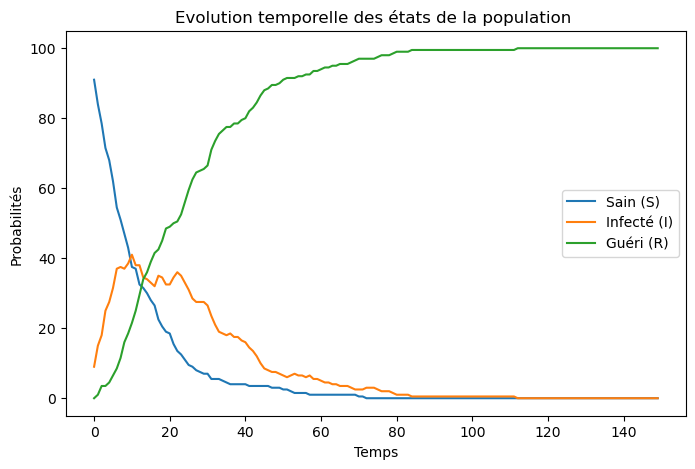

In [15]:

def affiche_graphe_pourcent(MatA, PHI0, t, n):
    A = np.arange(t)
    
    sequ_popu = sequence_aleatoire(MatA, PHI0, t, n)

    πt = np.zeros((t, 3))
    πt[:,0] = np.sum(sequ_popu == 0., axis=0)*100
    πt[:,1] = np.sum(sequ_popu == 1., axis=0)*100
    πt[:,2] = np.sum(sequ_popu == 2., axis=0)*100
    πt /=n    
    graph = plt.figure(figsize=(8, 5))
    plt.title("Evolution temporelle des états de la population ")
    plt.plot(A, πt[:,0], label='Sain (S)')
    plt.plot(A, πt[:,1], label="Infecté (I)")
    plt.plot(A, πt[:,2], label="Guéri (R)")
    plt.xlabel("Temps")
    plt.ylabel("Probabilités")
    plt.legend()
    plt.show()

affiche_graphe_pourcent(MatA,π0, 150, 200 )

Meme question pour une population de  5 individus et 5000
individus

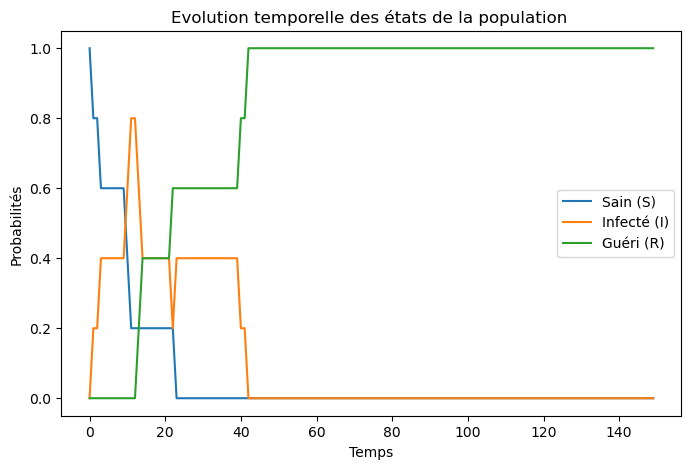

In [16]:
affiche_graphe_prop(MatA,π0, 150, 5 )


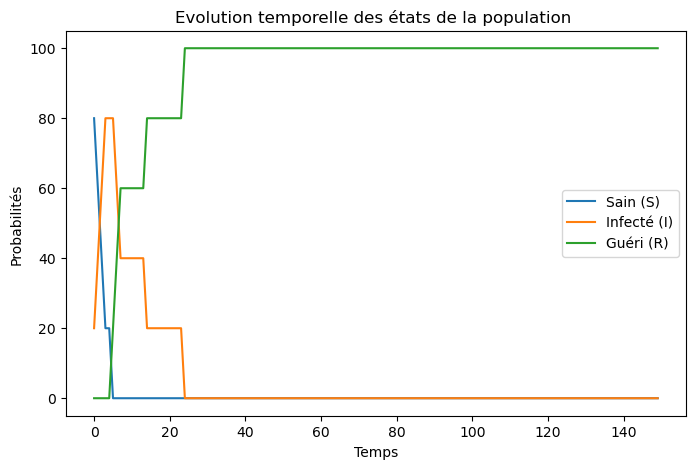

In [17]:
affiche_graphe_pourcent(MatA,π0, 150, 5 )

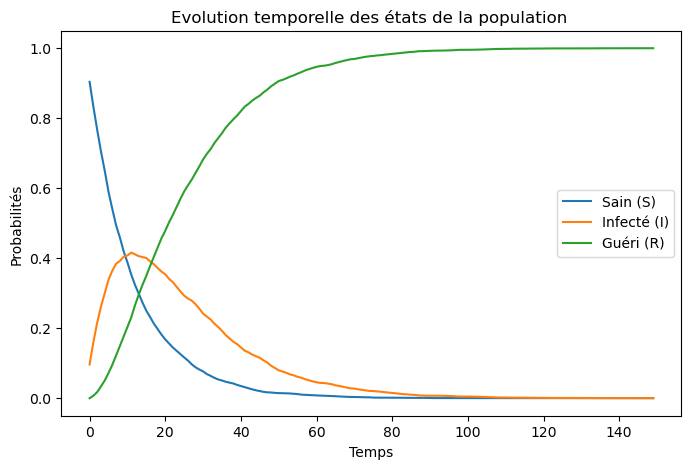

In [18]:
affiche_graphe_prop(MatA,π0, 150, 5000 )


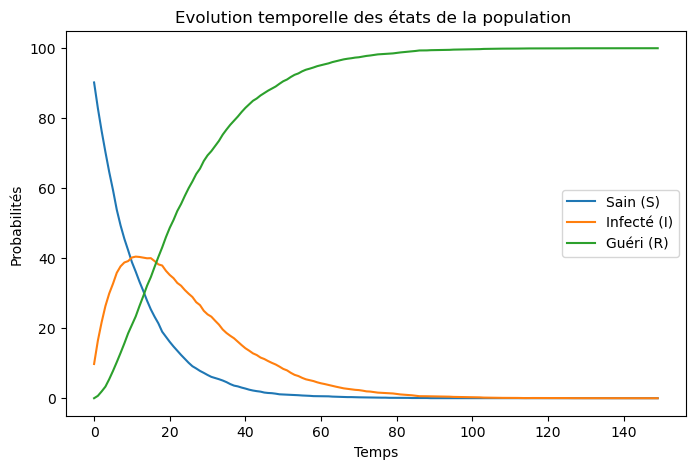

In [19]:
affiche_graphe_pourcent(MatA,π0, 150, 5000 )


# Longueur de l’infection



1.  La longueur moyenne d’une séquence de I: 



Pour 200 individus et une durée de 150 jours on a : 

In [20]:
sequ_popu = sequence_aleatoire(MatA,  π0, 150, 200)
lenght = np.count_nonzero(sequ_popu == 1., axis=1)
print("La longueur moyenne d'infection est de", np.mean(lenght), "jours")

La longueur moyenne d'infection est de 14.215 jours




2.   Afficher la distribution observée de la longueur d’infection



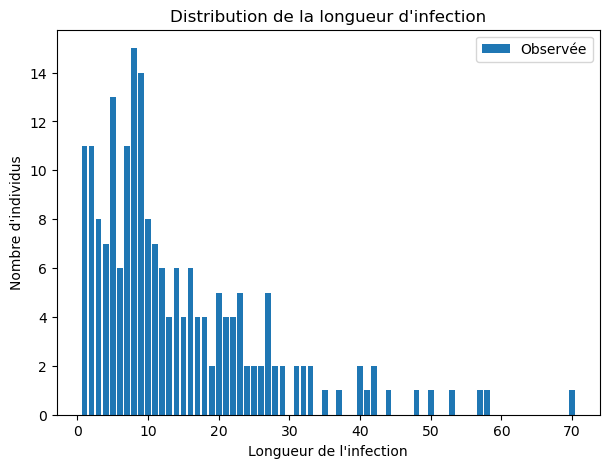

In [21]:
harmonique = plt.figure(figsize=(7, 5))
ind, long = np.unique(lenght, return_counts=True)
plt.title("Distribution de la longueur d'infection")
plt.bar(ind, long, label="Observée")
plt.xlabel("Longueur de l'infection")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()



3.   La longueur théorique d’une séquence de I:



Les longueurs d'infections calculées précédemment sont les valeurs observées.

- Soit Pi, la probabilité de passer de l'état I à l'état R. 
- Les longueurs théoriques suivent des lois géométriques  de paramètre Pi.

Calculons Pi et calculons la longueur théorique:

In [22]:
Pi = MatA[1, 2]
q = 1 - Pi
print("La probabilité de passer de l'état I à l'état R est de", Pi)
print("La longueur d'infection théorique est de", 1/Pi, "jours")

La probabilité de passer de l'état I à l'état R est de 0.07
La longueur d'infection théorique est de 14.285714285714285 jours


Calcul de la distribution théorique de la longueur d'infection:

In [23]:
long_theorique = np.zeros_like(lenght, dtype=float)
for i in range(0, len(lenght)):
    long_theorique[i] = (q**i)*Pi*200

5. Affichage de la distribution théorique de la longueur d’infection

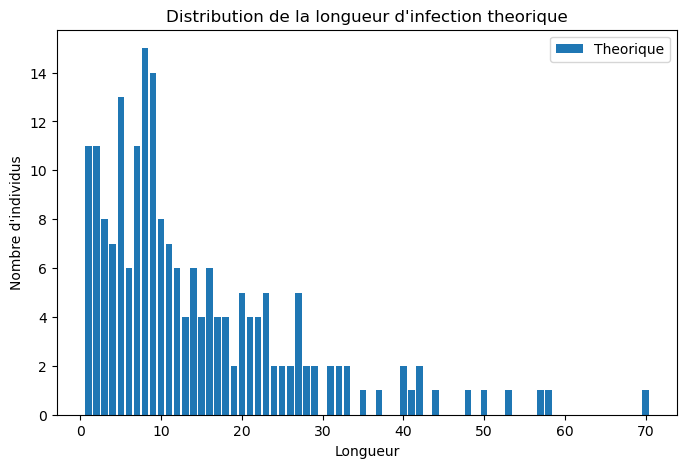

In [24]:
graph = plt.figure(figsize=(8, 5))
ind, long = np.unique(lenght, return_counts=True)
plt.title("Distribution de la longueur d'infection theorique")
plt.bar(ind, long, label="Theorique")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

4.Comparaison la longueur estimée et la longueur théorique


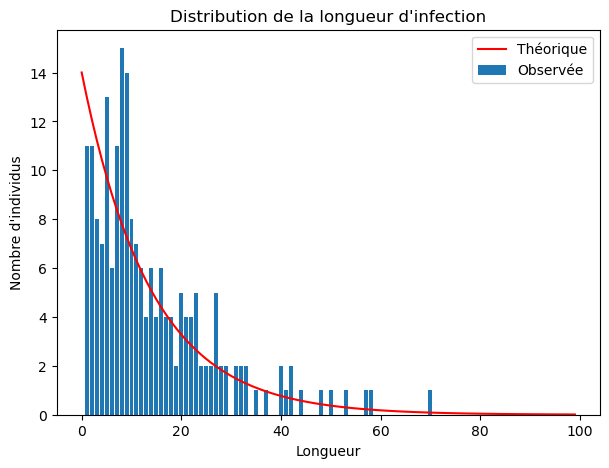

In [25]:
graph = plt.figure(figsize=(7, 5))
plt.title("Distribution de la longueur d'infection")
plt.bar(ind, long, label="Observée")
plt.plot(np.arange(100), long_theorique[:100], label="Théorique", color="red")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

# Petites modifications autour de ce modele:

1. Taille de la population de 4000 sur 150 jours

In [26]:
sequ_popu = sequence_aleatoire(MatA,  π0, 150, 4000)
lenght = np.count_nonzero(sequ_popu == 1., axis=1)
print("La longueur moyenne d'infection est de", np.mean(lenght), "jours")

La longueur moyenne d'infection est de 14.14425 jours


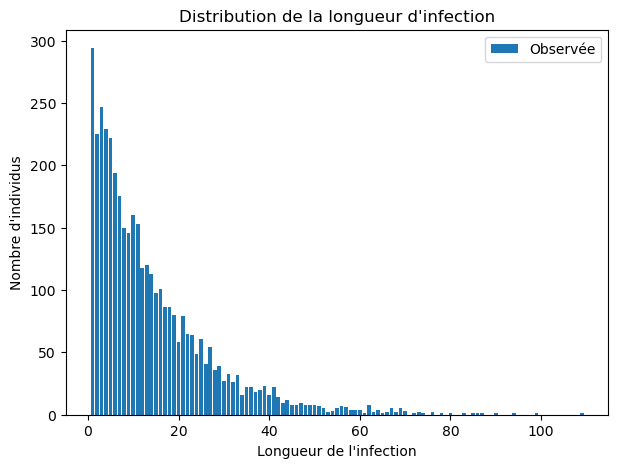

In [27]:
harmonique = plt.figure(figsize=(7, 5))
ind, long = np.unique(lenght, return_counts=True)
plt.title("Distribution de la longueur d'infection")
plt.bar(ind, long, label="Observée")
plt.xlabel("Longueur de l'infection")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

In [28]:
Pi = MatA[1, 2]
q = 1 - Pi
print("La probabilité de passer de l'état I à l'état R est de", Pi)
print("La longueur d'infection théorique est de", 1/Pi, "jours")

La probabilité de passer de l'état I à l'état R est de 0.07
La longueur d'infection théorique est de 14.285714285714285 jours


In [29]:
long_theorique = np.zeros_like(lenght, dtype=float)
for i in range(0, len(lenght)):
    long_theorique[i] = (q**i)*Pi*200

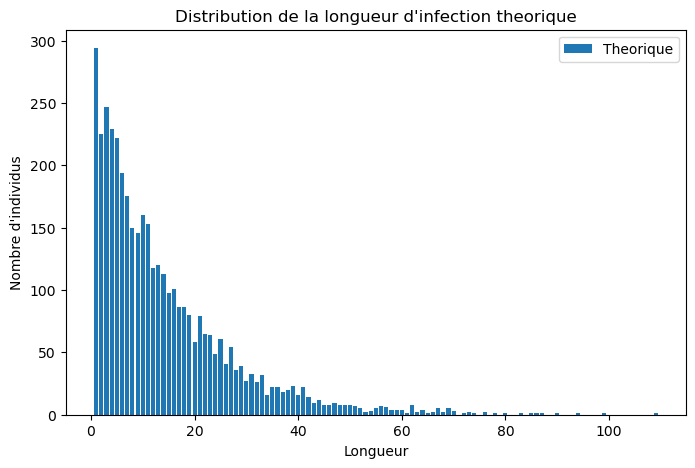

In [30]:
graph = plt.figure(figsize=(8, 5))
ind, long = np.unique(lenght, return_counts=True)
plt.title("Distribution de la longueur d'infection theorique")
plt.bar(ind, long, label="Theorique")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

2. la distribution de probabilité initiale:

In [31]:
π1= np.array([0.6, 0.3, 0.1])
sequ_popu = sequence_aleatoire(MatA,  π1, 150, 180)
lenght = np.count_nonzero(sequ_popu == 1., axis=1)
print("La longueur moyenne d'infection est de", np.mean(lenght), "jours")

La longueur moyenne d'infection est de 13.21111111111111 jours


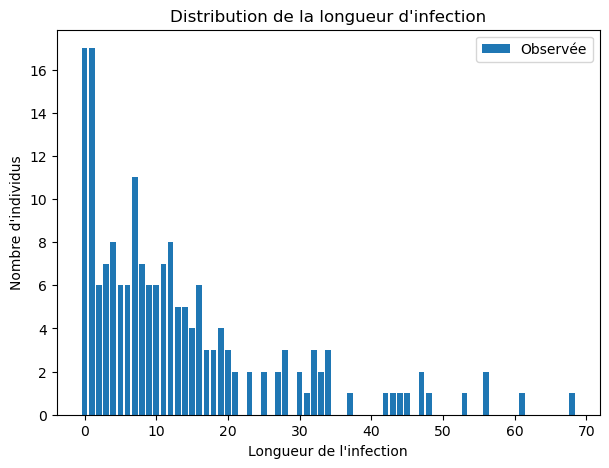

In [32]:
harmonique = plt.figure(figsize=(7, 5))
ind, long = np.unique(lenght, return_counts=True)
plt.title("Distribution de la longueur d'infection")
plt.bar(ind, long, label="Observée")
plt.xlabel("Longueur de l'infection")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

In [33]:
Pi = MatA[1, 2]
q = 1 - Pi
print("La probabilité de passer de l'état I à l'état R est de", Pi)
print("La longueur d'infection théorique est de", 1/Pi, "jours")

La probabilité de passer de l'état I à l'état R est de 0.07
La longueur d'infection théorique est de 14.285714285714285 jours


In [34]:
long_theorique = np.zeros_like(lenght, dtype=float)
for i in range(0, len(lenght)):
    long_theorique[i] = (q**i)*Pi*200

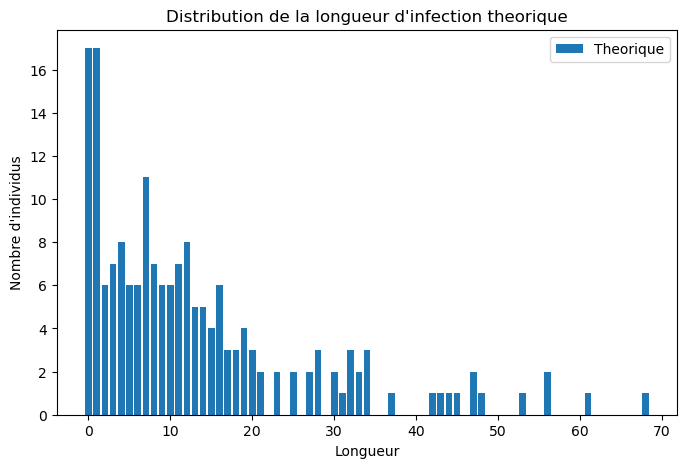

In [35]:
graph = plt.figure(figsize=(8, 5))
ind, long = np.unique(lenght, return_counts=True)
plt.title("Distribution de la longueur d'infection theorique")
plt.bar(ind, long, label="Theorique")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

3. Les probabilités de transition:

In [36]:
MatT=MatA.copy()
MatT[0,0] = 0.76
MatT[0,1] = 0.24
sequ_popu = sequence_aleatoire(MatT,  π0, 150, 200)
lenght = np.count_nonzero(sequ_popu == 1., axis=1)
print("La longueur moyenne d'infection est de", np.mean(lenght), "jours")

La longueur moyenne d'infection est de 15.08 jours


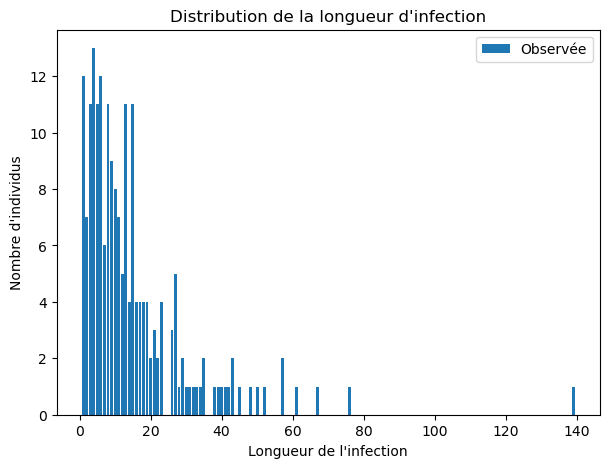

In [37]:
harmonique = plt.figure(figsize=(7, 5))
ind, long = np.unique(lenght, return_counts=True)
plt.title("Distribution de la longueur d'infection")
plt.bar(ind, long, label="Observée")
plt.xlabel("Longueur de l'infection")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

In [38]:
Pi = MatA[1, 2]
q = 1 - Pi
print("La probabilité de passer de l'état I à l'état R est de", Pi)
print("La longueur d'infection théorique est de", 1/Pi, "jours")

La probabilité de passer de l'état I à l'état R est de 0.07
La longueur d'infection théorique est de 14.285714285714285 jours


In [39]:
long_theorique = np.zeros_like(lenght, dtype=float)
for i in range(0, len(lenght)):
    long_theorique[i] = (q**i)*Pi*200

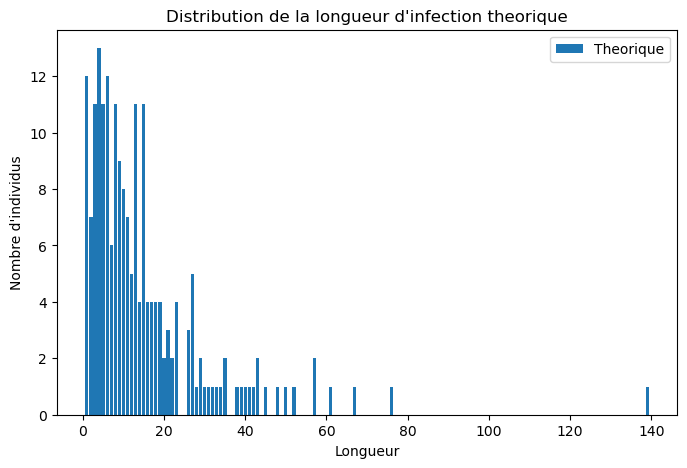

In [40]:
graph = plt.figure(figsize=(8, 5))
ind, long = np.unique(lenght, return_counts=True)
plt.title("Distribution de la longueur d'infection theorique")
plt.bar(ind, long, label="Theorique")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

# 3 -Description du second modèle


## Analyse du modèle



1.   Ce processus est stochastique , la proprieté de Markov d'ordre 1 est respectée puisque chaque état à t+1 ne dépend que de son état d'origine à t donc il peut etre modelisé par une chaine de Markov.






2.   La nouvelle matrice de transition

| \ | S | I | R |
|:---:|:---:|:---:|:---:|
| S | 0.92 | 0.08 | 0 |
| I | 0 | 0.93 | 0.07 |
|R | 0.02 | 0 | 0.98 |



In [41]:
MatA = MatA.copy()
MatA[2,0] = 0.02
MatA[2,2] = 0.98
print(MatA)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


In [42]:
print(MatA, "est-elle stochastique ?", ("oui" if is_stoch(MatA) else "non"))

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]] est-elle stochastique ? oui




3. cette chaine de markov est :
- apériodique (car il existe des états qui bouclent sur eux meme)
- irréductible car touts les étas sont communiquants 
- reccurente positive 

 => donc elle est ergodique






4.   Calcule de la matrice A × A , Même question pour A3 et A4 :




In [43]:
A2 = np.linalg.matrix_power(MatA, 2)
print(A2, "est-elle stochastique ?", ("oui" if is_stoch(A2) else "non"))

[[0.8464 0.148  0.0056]
 [0.0014 0.8649 0.1337]
 [0.038  0.0016 0.9604]] est-elle stochastique ? non


In [44]:
A3 = np.linalg.matrix_power(MatA, 3)
print(A3, "est-elle stochastique ?", ("oui" if is_stoch(A3) else "non"))

[[0.7788   0.205352 0.015848]
 [0.003962 0.804469 0.191569]
 [0.054168 0.004528 0.941304]] est-elle stochastique ? non


In [45]:
A4 = np.linalg.matrix_power(MatA, 4)
print(A3, "est-elle stochastique ?", ("oui" if is_stoch(A4) else "non"))

[[0.7788   0.205352 0.015848]
 [0.003962 0.804469 0.191569]
 [0.054168 0.004528 0.941304]] est-elle stochastique ? non




5. Nouvelle evolution de la population:



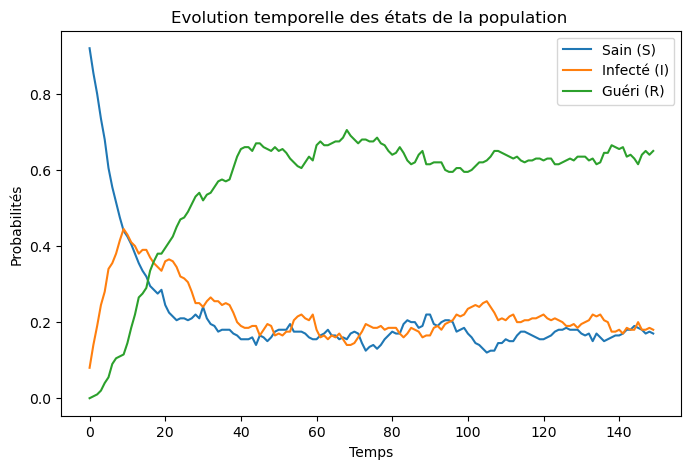

In [46]:
affiche_graphe_prop(MatA,π0, 150, 200 )


On remarque dans le graphe que:

- Avant l'épidémie, tous les individus sont sains car probabilité d'être sain est maximale puis elle baisse considérablement sans pour autant devenir nulle car dans ce cas la peut passer de guéri à sain . Aux alentours de t = 70, la probabilité pour un individu d'être sain se stabilise avec une proba avoisinant les 20%.

- La probabilité pour un individu d'être infecté, au début de la pandémie avoisine 0. Elle croît parallèlement à la diminution des individus sains et au alentours de  t = 20, elle atteint son seuil au alentour des  40%. Ensuite, elle baisse légèrement et se stabilise au meme niveau que les individus sain tout en restant supérieur.

- La proportion d'individus guéris est au départ de 0. Elle croit pendant  que les 2 autres baissent et se stabilise aux instants proches de t = 60  avec un proba de [60%,70%]

Aux instants t > 60, les graphes converge et les probabilités des états se stabilisent.



6.  Refaites les simulations avec une autre distribution de probabilité initiale



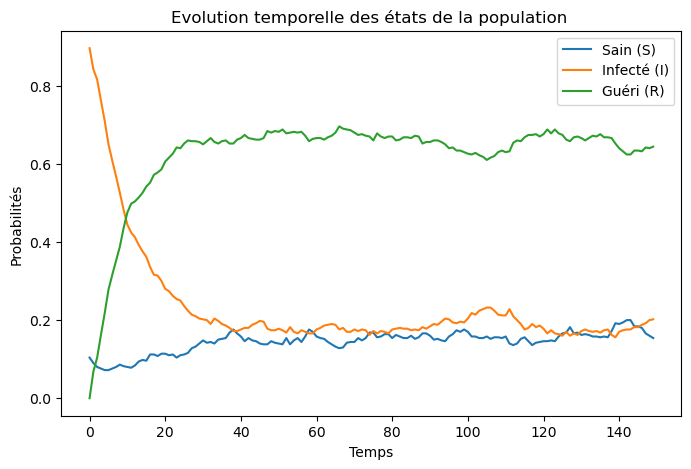

In [47]:
π0 = [0.1, 0.9, 0.0]
affiche_graphe_prop(MatA,π0, 150, 500 )

On remarque que:

- Pour 500 individus observées en 150 jours , au debut 90% des individus sont sains , le nombre d'individus sain decroit au fil du temps mais ne s'annulle jamais car un individu guéri peut redevenir sain au alentour de 50 jours le nombre d'invidus sain et guéri évolue de façon parallèle.

- Au debut de l'experience le nombre d'infectés et de 10% et aucun n'est guéri, le nombre d'infectés atteint son seuil au bout du 10 jours puis il decroit mais ne s'annule jamais , donc la pandémie ne prend pas fin mais a un grand taux de guéri



7.   La distribution de probabilité stationnaire



In [48]:
dt = np.zeros_like(MatA)
Matn = MatA.copy()

while not np.all(Matn == dt):
    dt = Matn.copy()
    Matn = np.dot(Matn, MatA)

print("La distribution de probabilités stationnaire est", Matn[0])

La distribution de probabilités stationnaire est [0.1627907  0.18604651 0.65116279]


- Representation graphique de la distribution stationnaire:

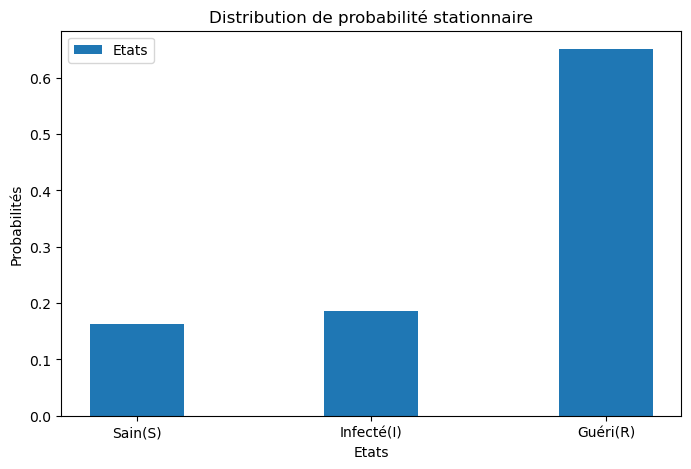

In [49]:
graph = plt.figure(figsize=(8,5))
plt.title("Distribution de probabilité stationnaire")
plt.bar(np.array(["Sain(S)", "Infecté(I)", "Guéri(R)"]), Matn[0], label="Etats", width=0.4)
plt.xlabel("Etats")
plt.ylabel("Probabilités")
plt.legend()
plt.show()

- Simulations pour t assez grand:

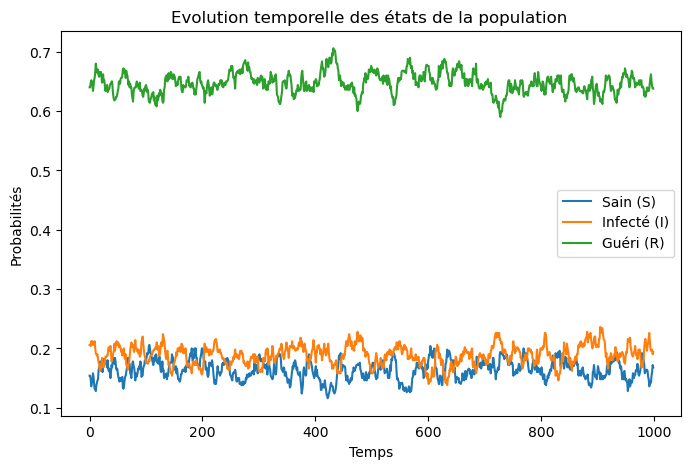

In [50]:
affiche_graphe_prop(MatA,Matn[0], 1000, 500 )

la distribution de probabilité stationnaire* est toujours atteinte à un temps t donné, en fonction de la distribution de probabilité initiale. On le remarque bel et bien sur toutes les simulations faites précédemment sur ce modèle doc il ya convergence 

# Longueur de l’immunité

1. La longueur moyenne d’une séquence de R:

Dans ce modéle des séquences de R peuvent apparaitre plusieurs fois pour un individu car on peut passer de l'etat guérie à sain donc il faut calculer le nombre de sequence.

In [51]:
def longeur_moy_R(MatA,π0,t,n):
    sequ_popu = sequence_aleatoire(MatA, π0, t, n)
    MemeR=False
    nbR=0
    s=0
    li =np.zeros(sequ_popu.shape[0])
    for  i in sequ_popu:
        nbR=0
        nbJR=0
        for j in i:
            if(j==2.0):
                nbJR+=1
                if(not MemeR):
                    nbR+=1
                    MemeR=True
            else:
                MemeR=False
        li[s]=nbJR/nbR
        s+=1
    return np.mean(li)


In [52]:
π0 = np.array([0.9, 0.1, 0])
print("La longueur moyenne d'infection est de", longeur_moy_R(MatA,π0,150,200), "jours")

La longueur moyenne d'infection est de 46.25316666666666 jours


2. La longueur théorique d’une séquence de R:

Soit Pi, la probabilité de passer de l'état R à l'état S. Les longueurs théoriques suivent des lois géométriques de paramètre Pi.

- Calculons Pi et la longueur théorique:

In [53]:
Pi = MatA[2, 0]
q = 1 - Pi
print("La probabilité de passer de l'état R à l'état S est de", Pi)
print("La longueur d'immunite théorique est de", 1/Pi, "jours")

La probabilité de passer de l'état R à l'état S est de 0.02
La longueur d'immunite théorique est de 50.0 jours


3. Affichage la distribution théorique et la distribution observée de la longueur de l’immunité:

In [54]:
 sequ_popu = sequence_aleatoire(MatA, π0, 150, 200)
lenght = np.count_nonzero(sequ_popu == 2., axis=1)
long_theorique = np.zeros_like(lenght, dtype=float)
for i in range(0, len(lenght)):
    long_theorique[i] = (q**i)*Pi*200

- Représentation de la distribution théorique:

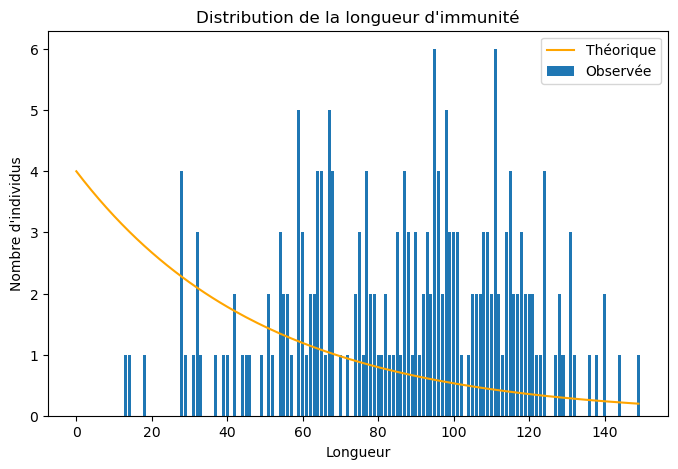

In [55]:
harmonique = plt.figure(figsize=(8, 5))
plt.title("Distribution de la longueur d'immunité")
ind, long = np.unique(lenght, return_counts=True)
plt.bar(ind, long, label="Observée")
plt.plot(long_theorique[:150], label="Théorique", color="orange")
plt.xlabel("Longueur")
plt.ylabel("Nombre d'individus")
plt.legend()
plt.show()

## Modifier le modèle

1. L'évolution de l’épidémie si on modifie la probabilité pour un individu sain de devenir infecté:

[[0.8  0.2  0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


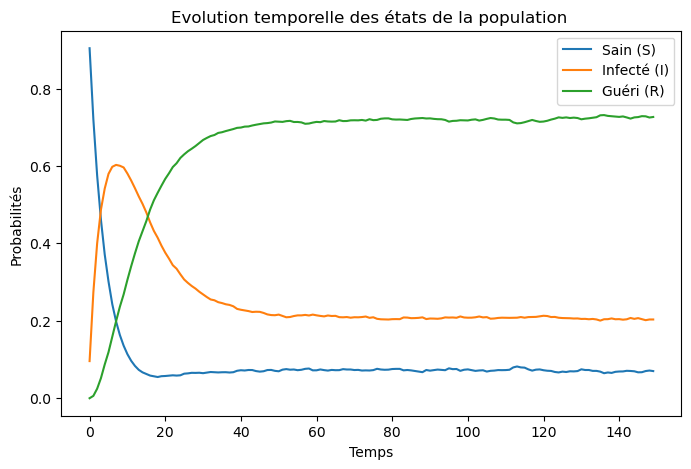

In [56]:
mat2 = MatA.copy()
mat2[0,0] = 0.8
mat2[0,1] = 0.2
π0 = np.array([0.9, 0.1, 0])
print(mat2)
affiche_graphe_prop(mat2,π0, 150,10000 )

[[0.54 0.46 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


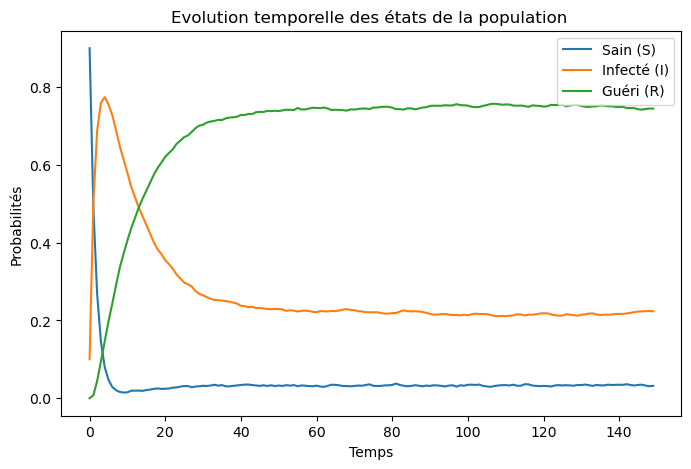

In [57]:
mat2 = MatA.copy()
mat2[0,0] = 0.54
mat2[0,1] = 0.46
π0 = np.array([0.9, 0.1, 0])
print(mat2)
affiche_graphe_prop(mat2,π0, 150,10000 )

On remarque que si on augmente la probabilité pour un individu sain de devenir infecté, le nombre d'individus inféctés augmente rapidement contrairement au nombre d'individus sains qui diminue rapidement et la probabilite d'etre gueri est plus élevé.
on remarque aussi que l'ecart entre les nombres d'individus infecte et sain grandis de plus en plus au moment de la stabilité.


2. L'évolution de l’épidémie si on modifie la probabilité pour un individu guéri de devenir sain:

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.1  0.   0.9 ]]


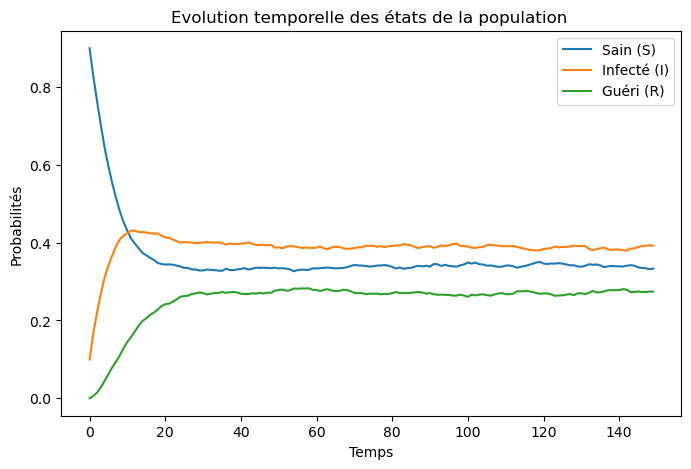

In [58]:
mat3 = MatA.copy()
mat3[2,0] = 0.1
mat3[2,2] = 0.9
print(mat3)
affiche_graphe_prop(mat3,π0, 150,10000)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.37 0.   0.63]]


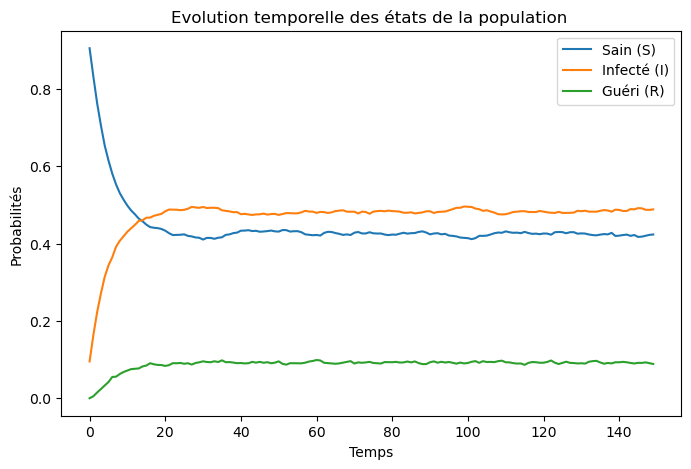

In [59]:
mat3 = MatA.copy()
mat3[2,0] = 0.37
mat3[2,2] = 0.63
print(mat3)
affiche_graphe_prop(mat3,π0, 150,10000)

- On remarque que plus on augmente la probabilité pour un individu guéri de devenir sain, plus le nombre de guéri diminue fortement contrairement au individu infecté et sain qui augumente pratiquement au meme niveau avec plus d'infecte que de sain.

## Partie 4 : confinement

On peut imaginer que si des mesures de distanciation sociale sont mises en place, la probabilité de
devenir infecté devient nulle.

1. Nous allons alterner entre les périodes de non distanciation et de distanciation

- On note MatA la matrice de transition pendant la période de non distanciation, et MatB la matrice de transition pendant la période de distanciation:

In [66]:
print(MatA)
MatB = MatA.copy()
MatB[0, 0] = 1.
MatB[0, 1] = 0.
print(MatB)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]
[[1.   0.   0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


2. Simulation du nouveau model:

In [67]:
π0 = [1, 0, 0]#au temps initial tous les individus sont sains

In [68]:
def simulation_confinement(MatA, MatB, PI0, t, n, confinement=False, confine=0.1 ,no_confine=0.25):
    Jours = np.arange(t)
    confinements = []
    deconfinements = [] 
    seq = np.zeros((n, t))
    seq[:, 0] = np.argmax(PI0)
    for i in range(1, t):
        if(confinement):
            mat=MatB
        else:
            mat=MatA
        for j in range(n):
            seq[j, i] = np.random.choice([0., 1., 2.], p=mat[int(seq[j, i-1])])
        
        # pourcentage des infectes
        pI = np.count_nonzero(seq[:, i] == 1.) / n
        
        if confinement:
            if pI <= confine:
                confinement = False
                deconfinements.append(i)
        else:
            if pI >= no_confine:
                confinement = True
                confinements.append(i)
    
    print("Nombre de confinements:", len(confinements))
    print("Nombre de déconfinements:", len(deconfinements))
    print("les jours du debut  des confinements:", confinements)
    print("les jours du debut des déconfinements:", deconfinements)
            
    πt = np.zeros((t, 3))
    πt[:,0] = np.sum(seq == 0., axis=0)
    πt[:,1] = np.sum(seq == 1., axis=0)
    πt[:,2] = np.sum(seq == 2., axis=0)
    πt /= n
        
    fig = plt.figure(figsize=(7, 5))
    plt.title("Evolution temporelle des états de la population")
    plt.plot(Jours, πt[:,0], label='Sain (S)')
    plt.plot(Jours, πt[:,1], label="Infecté (I)")
    plt.plot(Jours, πt[:,2], label="Guéri (R)")
    plt.xlabel("Temps t")
    plt.ylabel("Probabilités")
    plt.legend()
    plt.show()

1. Population de 200 individus observés pendant 150 jours:

Nombre de confinements: 7
Nombre de déconfinements: 6
les jours du debut  des confinements: [5, 21, 39, 58, 82, 117, 146]
les jours du debut des déconfinements: [18, 33, 52, 74, 97, 127]


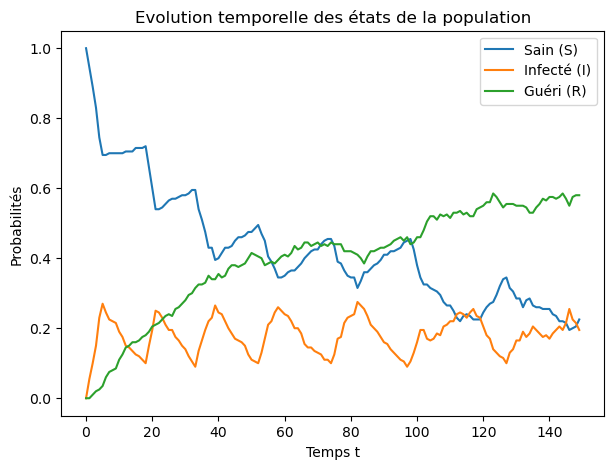

In [69]:
simulation_confinement(MatA, MatB, π0, 150, 200)

2. Population de 1000 sur 200 jours:

Nombre de confinements: 5
Nombre de déconfinements: 5
les jours du debut  des confinements: [5, 24, 45, 65, 91]
les jours du debut des déconfinements: [20, 39, 56, 78, 104]


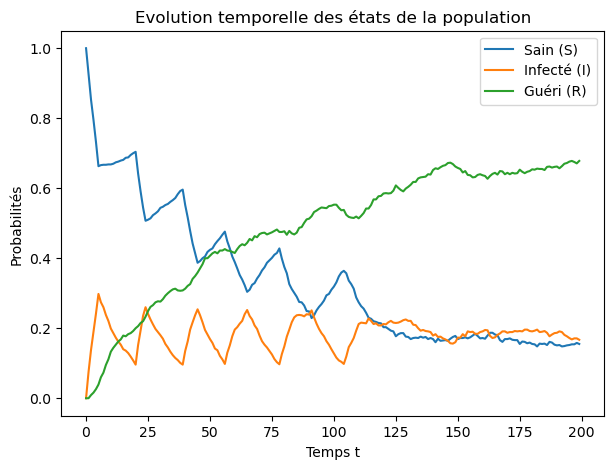

In [70]:
simulation_confinement(MatA, MatB, π0, 200, 1000)

3. Population de 1000 sur 5000 jours

Nombre de confinements: 5
Nombre de déconfinements: 5
les jours du debut  des confinements: [5, 25, 42, 63, 87]
les jours du debut des déconfinements: [21, 37, 56, 76, 100]


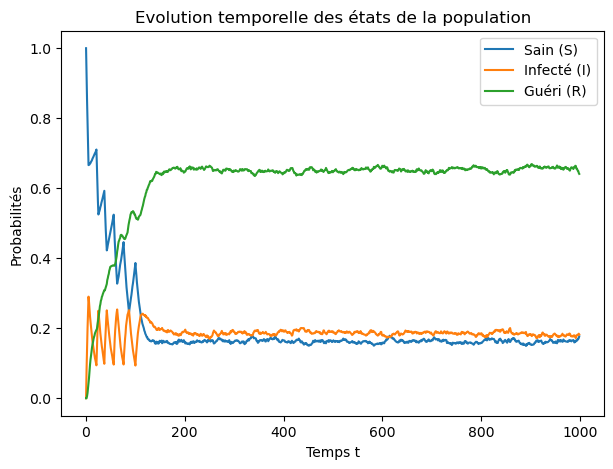

In [71]:
simulation_confinement(MatA, MatB, π0, 1000, 5000)

On conclu donc d'apres les simulations faites que les nombres de confinements et deconfinements necessaires sont de 5  chaqu'un.

# 5-Discussion

1. Les critiques:
- Ce modele n'est pas vraiment efficace dans le monde reel car il ne prend pas en compte certains cas comme les personnes non contagieuse, les malades qui ont différentes probabilités de changer d'état ou tout simplement les gens qui succombe.
- Il y'a aussi le cas ou on peut pas détecter les infectés si ils n'ont pas de symptomes.


2. Les solutions:
- Rajouter de nouveau états.
- Prendre en compte les facteurs d'environement.
- Prendre en compte les caractéristiques des personnes.
- créer un modèle evolutif avec les caractéristiques de la population.